In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv('data/Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


(-90.0, 90.0)

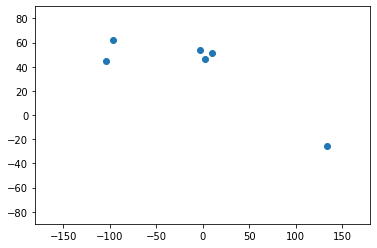

In [4]:
plt.scatter(data.Longitude, data.Latitude)
plt.xlim(-180,180)
plt.ylim(-90,90)

In [6]:
x = data.iloc[:, 1:3]
x.head(2)

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80


In [7]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [8]:
cluster = kmeans.fit_predict(x)
data['cluster'] = cluster
data

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


(-90.0, 90.0)

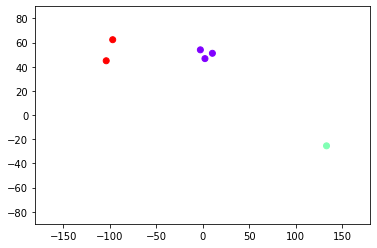

In [9]:
plt.scatter(data.Longitude, data.Latitude, c=data.cluster, cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)

(-90.0, 90.0)

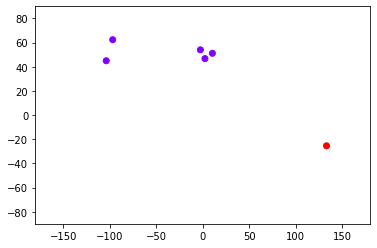

In [10]:
kmeans = KMeans(2)
kmeans.fit(x)
cluster =kmeans.fit_predict(x)
data['cluster2'] = cluster

plt.scatter(data.Longitude, data.Latitude, c= data.cluster2, cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)

In [11]:
data.Language.unique()

array(['English', 'French', 'German'], dtype=object)

In [12]:
data.Language = data.Language.map({'English':0, 'French':1 ,'German':2})
data

,Country,Latitude,Longitude,Language,cluster,cluster2
0,USA,44.97,-103.77,0,2,0
1,Canada,62.40,-96.80,0,2,0
2,France,46.75,2.40,1,0,0
3,UK,54.01,-2.53,0,0,0
4,Germany,51.15,10.40,2,0,0
5,Australia,-25.45,133.11,0,1,1


(-90.0, 90.0)

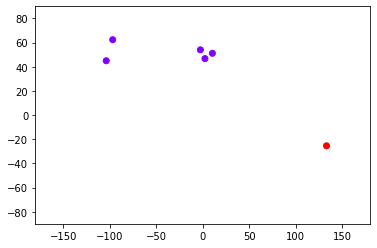

In [13]:
x = data.iloc[:, 1:4]
kmeans = KMeans(2)
kmeans.fit(x)
cluster = kmeans.fit_predict(x)
data['cluster2_lang'] = cluster

plt.scatter(data.Longitude, data.Latitude, c=data.cluster2_lang, cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)

In [14]:
raw_data = pd.read_csv('data/Categorical.csv')
raw_data.tail(3)

,name,Longitude,Latitude,continent
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa
240,Zimbabwe,29.851441,-19.004204,Africa


In [15]:
raw_data.continent.unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [16]:
data = raw_data.copy()

In [17]:
data['continent_num'] = data.continent.map({'North America':4, 'Asia':2,
                                            'Africa':0, 'Europe':3, 
                                            'South America':7,
                                            'Oceania':5, 
                                            'Antarctica':1, 
                                            'Seven seas (open ocean)':6})

In [18]:
# Within-Cluster-Sum-of-Squares (wcss)
kmeans.inertia_

13208.958119999996

In [19]:
x = data.iloc[:, 1:3]
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

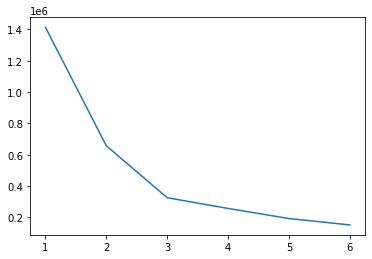

In [20]:
number_cluster = range(1,7)
plt.plot(number_cluster,wcss)

(-90.0, 90.0)

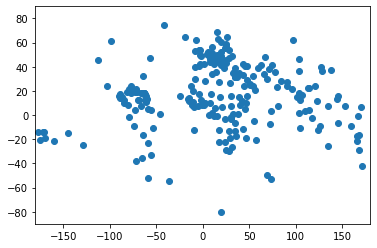

In [21]:
plt.scatter(data.Longitude, data.Latitude)
plt.xlim(-180,180)
plt.ylim(-90,90)

(-90.0, 90.0)

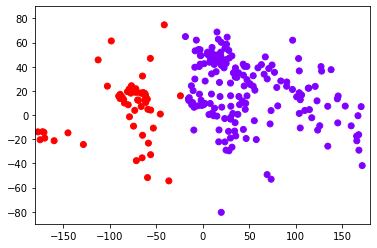

In [22]:
x = data.iloc[:, 1:3]
kmeans = KMeans(2)
kmeans.fit(x)
cluster = kmeans.fit_predict(x)
data['cluster2'] = cluster

plt.scatter(data.Longitude, data.Latitude, c=data.cluster2, cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)

(-90.0, 90.0)

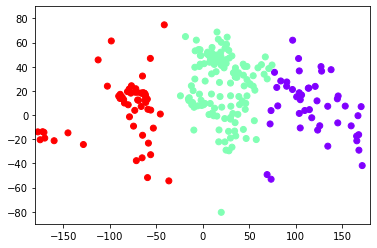

In [23]:
x = data.iloc[:, 1:3]
kmeans = KMeans(3)
kmeans.fit(x)
cluster = kmeans.fit_predict(x)
data['cluster3'] = cluster

plt.scatter(data.Longitude, data.Latitude, c=data.cluster3, cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)

In [24]:
iris = pd.read_csv('data/iris-dataset.csv')
iris.tail(3)

,sepal_length,sepal_width,petal_length,petal_width
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


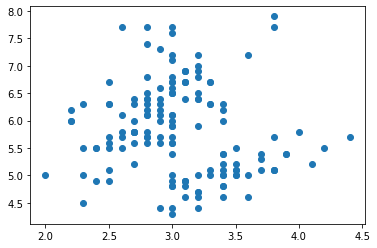

In [25]:
plt.scatter(iris.sepal_width, iris.sepal_length)

In [26]:
x = iris.iloc[:, 0:2]
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

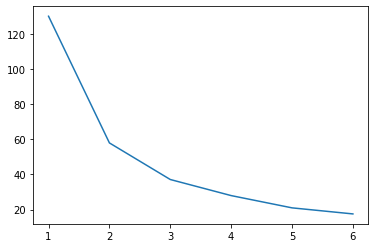

In [27]:
number_cluster = range(1,7)
plt.plot(number_cluster,wcss)

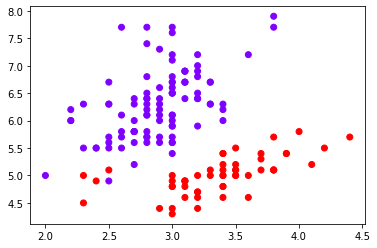

In [28]:
kmeans = KMeans(2)
kmeans.fit(iris)
cluster = kmeans.fit_predict(iris)
iris['cluster2'] = cluster
plt.scatter(iris.sepal_width, iris.sepal_length, c=iris.cluster2, cmap='rainbow')

In [29]:
from sklearn.preprocessing import scale

In [30]:
xscaled = scale(iris)

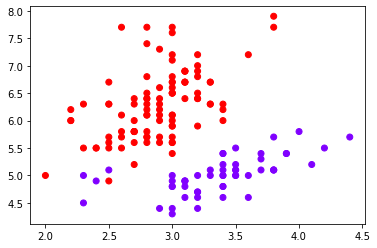

In [31]:
kmeans = KMeans(2)
kmeans.fit(xscaled)
cluster = kmeans.fit_predict(xscaled)
iris['scluster2'] = cluster

plt.scatter(iris.sepal_width, iris.sepal_length, c=iris.scluster2, cmap='rainbow')